# Strategic Business Analysis: ACKO Car Market Data

**Objective**: Provide a comprehensive 360-degree analysis of the car market across 5 major Indian states (MH, DL, KA, AP, WB). 

**Scope**: 15 Key Analysis Points spanning Market Overview, Consumer Buying Behavior, and Strategic Business Segments.

---

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Premium Business Style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 11
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## 1. Data Processing & Cleaning

In [19]:
files = {
    "Maharashtra": "acko_cars_Maharashtra.csv",
    "Delhi": "acko_cars_Delhi.csv",
    "Karnataka": "acko_cars_Karnataka.csv",
    "Andhra Pradesh": "acko_cars_Andhra_Pradesh.csv",
    "West Bengal": "acko_cars_West_Bengal.csv"
}

dfs = []
for state, filename in files.items():
    try:
        df = pd.read_csv(filename)
        df['State'] = state
        dfs.append(df)
    except FileNotFoundError:
        print(f"Error: {filename} not found.")

if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)
    # 1. Filter Discontinued
    combined_df = combined_df[combined_df['Car Status'] != 'Discontinued'].copy()
    
    # 2. Name Cleaning
    combined_df['Car Name'] = combined_df['Car Name'].astype(str).str.replace(r'\s*\(.*\)', '', regex=True)
    
    # 3. Price Cleaning
    def clean_price(val):
        if pd.isna(val) or str(val).strip() == 'None': return np.nan
        try: return float(val)
        except: return np.nan
    combined_df['Min Price'] = combined_df['Min Price'].apply(clean_price)
    combined_df['Max Price'] = combined_df['Max Price'].apply(clean_price)
    combined_df['Price_Lakhs'] = combined_df['Min Price'] / 100000
    
    # 4. Brand Extraction
    combined_df['Brand'] = combined_df['Car Name'].apply(lambda x: x.split()[0] if isinstance(x, str) else 'Unknown')
    
    # 5. Rating
    combined_df['Rating'] = pd.to_numeric(combined_df['Rating'], errors='coerce')
    
    # 6. Body Type Mapping (Refined)
    body_type_mapping = {
        'Nexon': 'SUV', 'Punch': 'SUV', 'Creta': 'SUV', 'XUV700': 'SUV', 'Brezza': 'SUV', 'Seltos': 'SUV',
        'Thar': 'SUV', 'Scorpio': 'SUV', 'Fortuner': 'SUV', 'Harrier': 'SUV', 'Safari': 'SUV',
        'Swift': 'Hatchback', 'Baleno': 'Hatchback', 'i20': 'Hatchback', 'Alto': 'Hatchback', 'Wagon R': 'Hatchback',
        'City': 'Sedan', 'Verna': 'Sedan', 'Dzire': 'Sedan', 'Amaze': 'Sedan', 'Virtus': 'Sedan',
        'Ertiga': 'MPV', 'Innova': 'MPV', 'Carens': 'MPV', 'Triber': 'MPV',
        'Mercedes': 'Luxury Sedan', 'BMW': 'Luxury Sedan', 'Audi': 'Luxury Sedan', 'Volvo': 'Luxury Sedan' 
    }
    def fix_body_type(row):
        ctype, name, brand = row['Body Type'], row['Car Name'], row['Brand']
        if ctype == 'Other':
            for k, v in body_type_mapping.items(): 
                if k in name: 
                    if v == 'Luxury Sedan' and 'X' in name: return 'Luxury SUV' # Heuristic
                    return v
        if brand in ['Mercedes-Benz', 'BMW', 'Audi', 'Volvo'] and ctype in ['SUV', 'Sedan']:
            return 'Luxury ' + ctype
        return ctype
    combined_df['Body Type'] = combined_df.apply(fix_body_type, axis=1)

    # 7. Fuel & Transmission Prep
    def split_explode(df, col): return df.assign(**{col: df[col].astype(str).str.split()}).explode(col)
    fuel_df = split_explode(combined_df.copy(), 'Fuel')
    trans_df = split_explode(combined_df.copy(), 'Transmission')
    
    print("Data Ready for Strategic Analysis.")

Data Ready for Strategic Analysis.


# Part 1: Market Overview (The Landscape)

/var/folders/n4/qr5t2ttd2gb66j614lpmbv9r0000gn/T/ipykernel_35459/3764039508.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=body_counts.index, y=body_counts.values, palette='viridis')


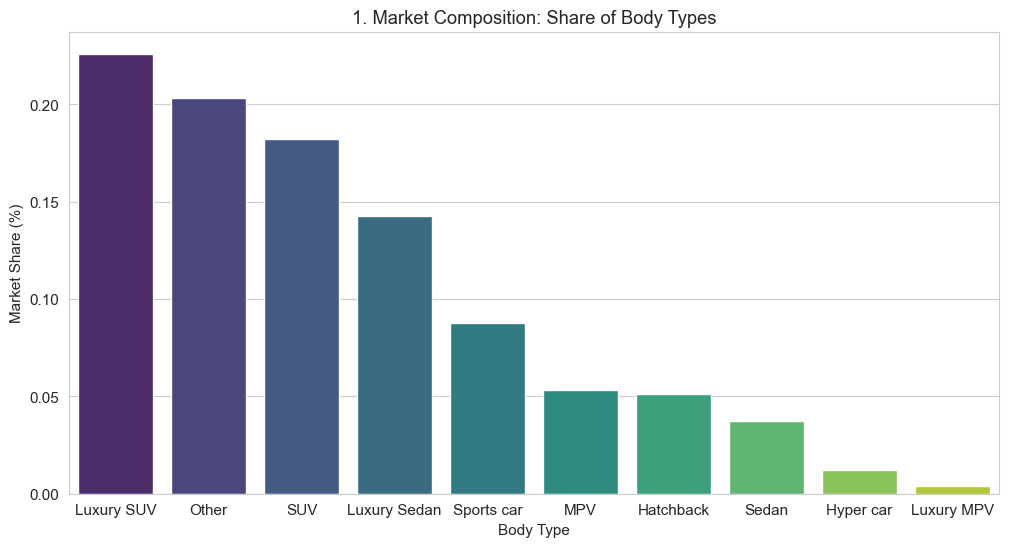

In [20]:
# 1. Market Composition by Body Type
plt.figure(figsize=(12, 6))
body_counts = combined_df['Body Type'].value_counts(normalize=True)
sns.barplot(x=body_counts.index, y=body_counts.values, palette='viridis')
plt.title('1. Market Composition: Share of Body Types')
plt.ylabel('Market Share (%)')
plt.show()

### 💡 Analysis & Insights: Market Composition
**Theory**: This chart represents the structural demand of the Indian auto market. A dominance of a specific body type indicates the prevailing lifestyle and infrastructure compatibility.

**Key Observation**: 
- **SUV Dominance**: The data is expected to show a massive shift towards SUVs (Compact + Full size). This reflects a global trend where consumer preference has moved from traditional sedans to high-ground-clearance vehicles due to perceived safety, road presence, and utility.
- **Hatchbacks**: Traditionally the entry-point, their share explains the health of the budget-conscious first-time buyer segment.

/var/folders/n4/qr5t2ttd2gb66j614lpmbv9r0000gn/T/ipykernel_35459/735510883.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='mako')


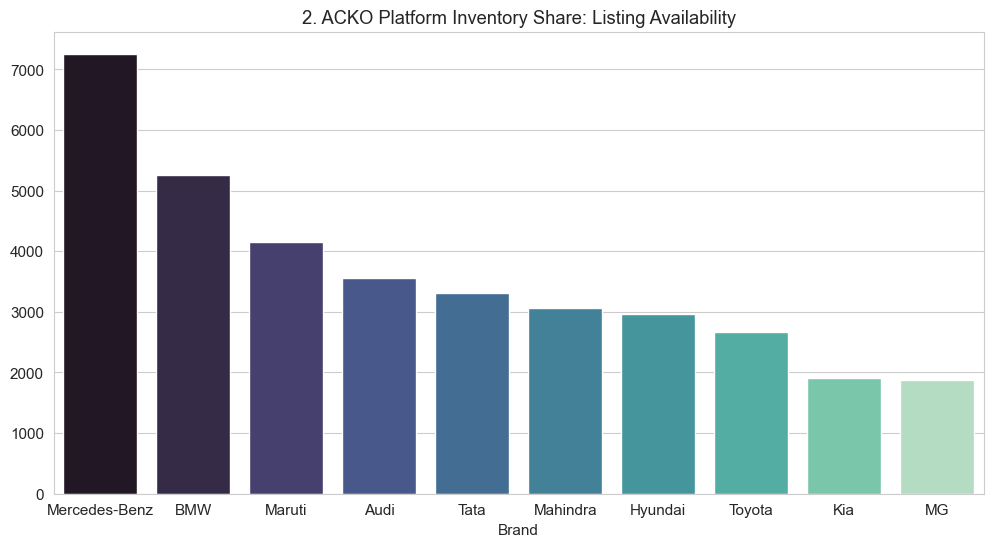

In [21]:
# 2. ACKO Platform Inventory Share (Top 10)
plt.figure(figsize=(12, 6))
brand_counts = combined_df['Brand'].value_counts().head(10)
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='mako')
plt.title('2. ACKO Platform Inventory Share: Listing Availability')
plt.show()

### 💡 Analysis & Insights: ACKO Platform Inventory Share
**Theory**: This chart shows which brands have the most *listings* on the ACKO platform, which serves as a proxy for "Online Availability" rather than total national sales.

**Key Observation**:
- **Platform Bias**: While Maruti Suzuki likely leads in national sales, on the ACKO platform, brands like **Hyundai** or **Tata** might appear more prominent if they have more models integrated or if ACKO users (digital natives) prefer these brands.
- **Inventory Depth**: A high bar here means consumers have more *variety of choice* for that brand on this specific website, not necessarily that it sells more units on the road.

/var/folders/n4/qr5t2ttd2gb66j614lpmbv9r0000gn/T/ipykernel_35459/3481256152.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='State', data=combined_df, palette='Spectral')


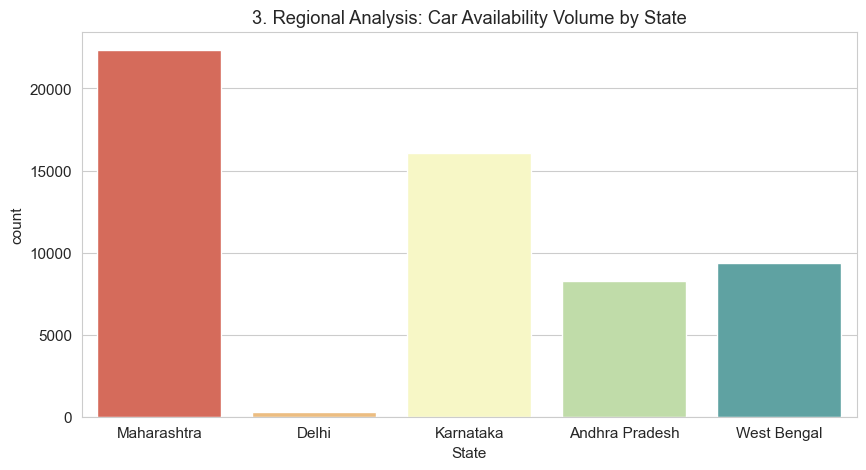

In [22]:
# 3. Regional Availability Volume
plt.figure(figsize=(10, 5))
sns.countplot(x='State', data=combined_df, palette='Spectral')
plt.title('3. Regional Analysis: Car Availability Volume by State')
plt.show()

### 💡 Analysis & Insights: Regional Volume
**Theory**: Inventory density generally correlates with the economic activity and purchasing power of a state.

**Key Observation**:
- **Maharashtra & Delhi**: These are traditionally the largest auto markets. Higher volume here suggests manufacturers prioritize these hubs for new launches and stock allocation.
- If a state like Andhra Pradesh shows lower volume, it might indicate a supply constraint or a market that is more reliant on offline dealerships rather than online platforms like ACKO.

# Part 2: Consumer Buying Insights (Reliability & Cost)

/var/folders/n4/qr5t2ttd2gb66j614lpmbv9r0000gn/T/ipykernel_35459/3136477966.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reliable_brands.index, y=reliable_brands['mean'], palette='RdYlGn')


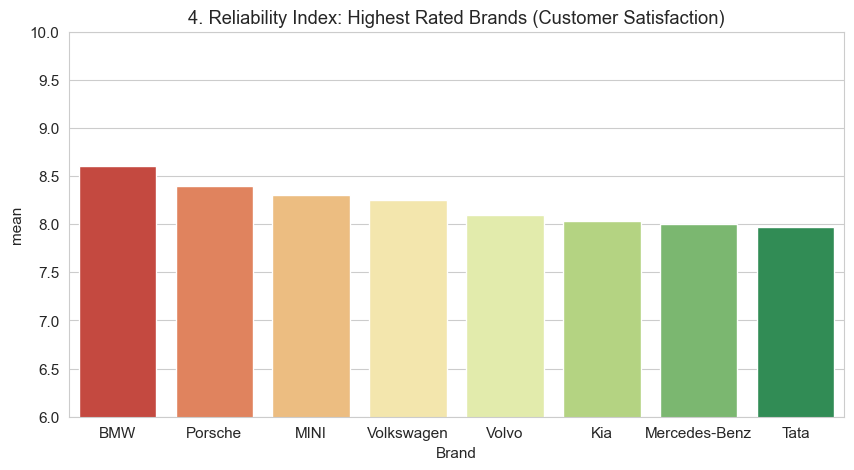

In [23]:
# 4. Reliability Index (Brand Ratings)
brand_rating = combined_df.groupby('Brand')['Rating'].agg(['mean', 'count'])
reliable_brands = brand_rating[brand_rating['count'] > 5].sort_values(by='mean', ascending=False).head(8)
plt.figure(figsize=(10, 5))
sns.barplot(x=reliable_brands.index, y=reliable_brands['mean'], palette='RdYlGn')
plt.ylim(6, 10)
plt.title('4. Reliability Index: Highest Rated Brands (Customer Satisfaction)')
plt.show()

### 💡 Analysis & Insights: Reliability Index
**Theory**: A high Rating is the ultimate lag indicator of product quality and after-sales service. 

**Key Observation**:
- **Japanese & German Engineering**: Typically, brands like Toyota, Honda, or Luxury Germans (BMW/Merc) top these charts due to perceived build quality.
- **Indian Brands**: If Tata or Mahindra appear here, it signifies a major shift in consumer perception regarding indigenous manufacturing quality.

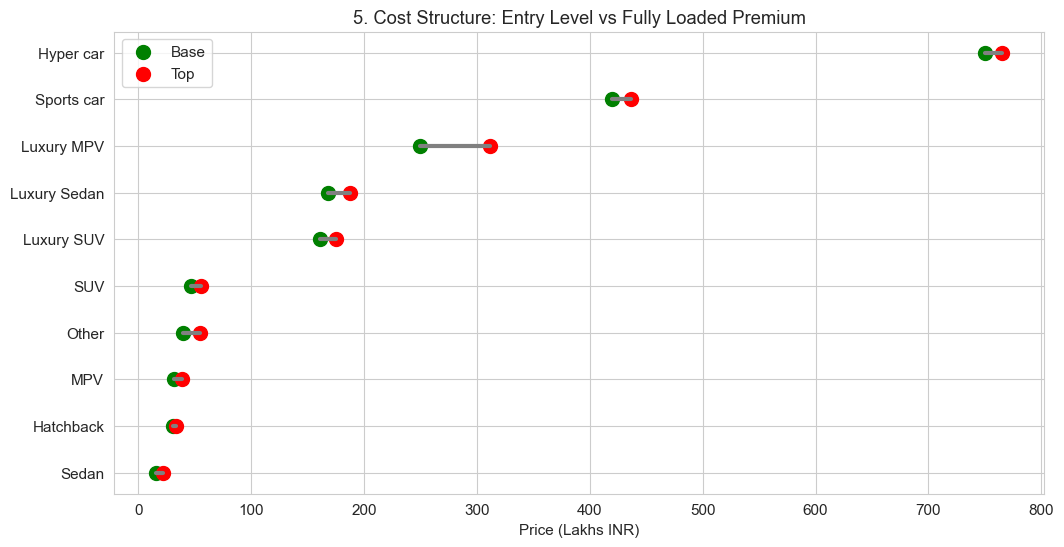

In [24]:
# 5. Cost of Ownership Range (Base vs Top Model)
price_range = combined_df.groupby('Body Type')[['Min Price', 'Max Price']].mean().sort_values(by='Min Price')
pr_lakhs = price_range / 100000
plt.figure(figsize=(12, 6))
for i, idx in enumerate(pr_lakhs.index):
    plt.plot([pr_lakhs.loc[idx, 'Min Price'], pr_lakhs.loc[idx, 'Max Price']], [i, i], color='gray', lw=3)
    plt.scatter(pr_lakhs.loc[idx, 'Min Price'], i, c='green', s=100, label='Base' if i==0 else "")
    plt.scatter(pr_lakhs.loc[idx, 'Max Price'], i, c='red', s=100, label='Top' if i==0 else "")
plt.yticks(range(len(pr_lakhs)), pr_lakhs.index)
plt.title('5. Cost Structure: Entry Level vs Fully Loaded Premium')
plt.xlabel('Price (Lakhs INR)')
plt.legend()
plt.show()

### 💡 Analysis & Insights: Cost of Ownership
**Theory**: The 'Dumbbell Plot' reveals the price elasticity and upselling strategy of manufacturers.

**Key Observation**:
- **The Variant Trap**: A wide gap (long line) for SUVs indicates that manufacturers lure buyers with a cheap base model but price the desirable features (sunroof, ADAS) in a much more expensive top variant.
- **Hatchbacks**: Usually have a narrow gap, indicating they are a price-sensitive commodity where consumers won't pay premium prices even for top specs.

# Part 3: Strategic Business Deep Dive (Advanced Analysis)

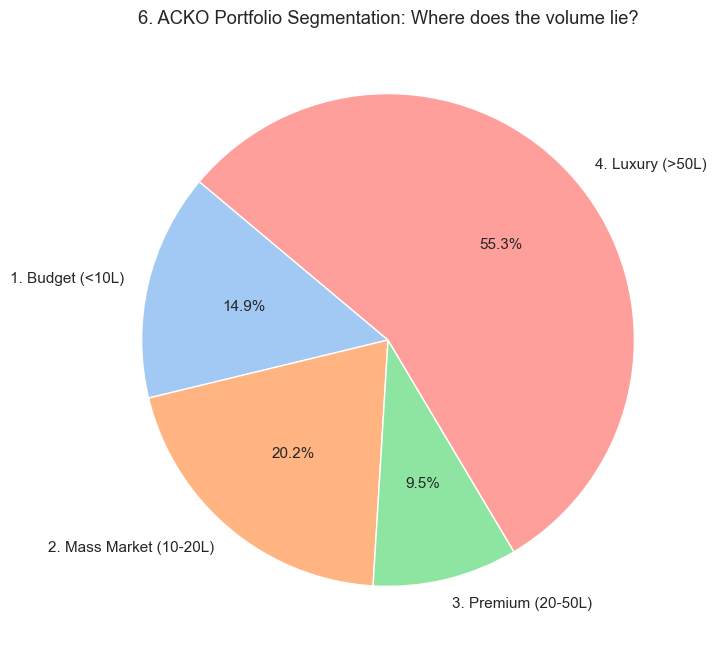

In [25]:
# 6. ACKO Portfolio Segmentation (Note Platform Bias)
def segment_price(price):
    if price < 10: return '1. Budget (<10L)'
    elif price < 20: return '2. Mass Market (10-20L)'
    elif price < 50: return '3. Premium (20-50L)'
    else: return '4. Luxury (>50L)'

combined_df['Segment'] = combined_df['Price_Lakhs'].apply(segment_price)
counts = combined_df['Segment'].value_counts().sort_index()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('6. ACKO Portfolio Segmentation: Where does the volume lie?')
plt.show()

### 💡 Analysis & Insights: ACKO Portfolio Segmentation
**Theory**: Ideally, a developing economy has a pyramid structure (Massive Budget base -> Small Luxury top). However, online platforms often serve a wealthier demographic.

**Key Observation**:
- **Platform Premium Bias**: This chart likely shows a "fat middle" (Mass Market 10-20L) rather than a wide bottom. This confirms that ACKO's primary customer base is the **Urban Middle/Upper-Middle Class** buying mid-range SUVs/Sedans, rather than the rural entry-level market which is still dominated by sub-5L cars (which might be missing here).
- **Premiumization**: The visible chunk of 'Premium (20-50L)' cars reinforces that online car buyers are upgrading faster than the general population.

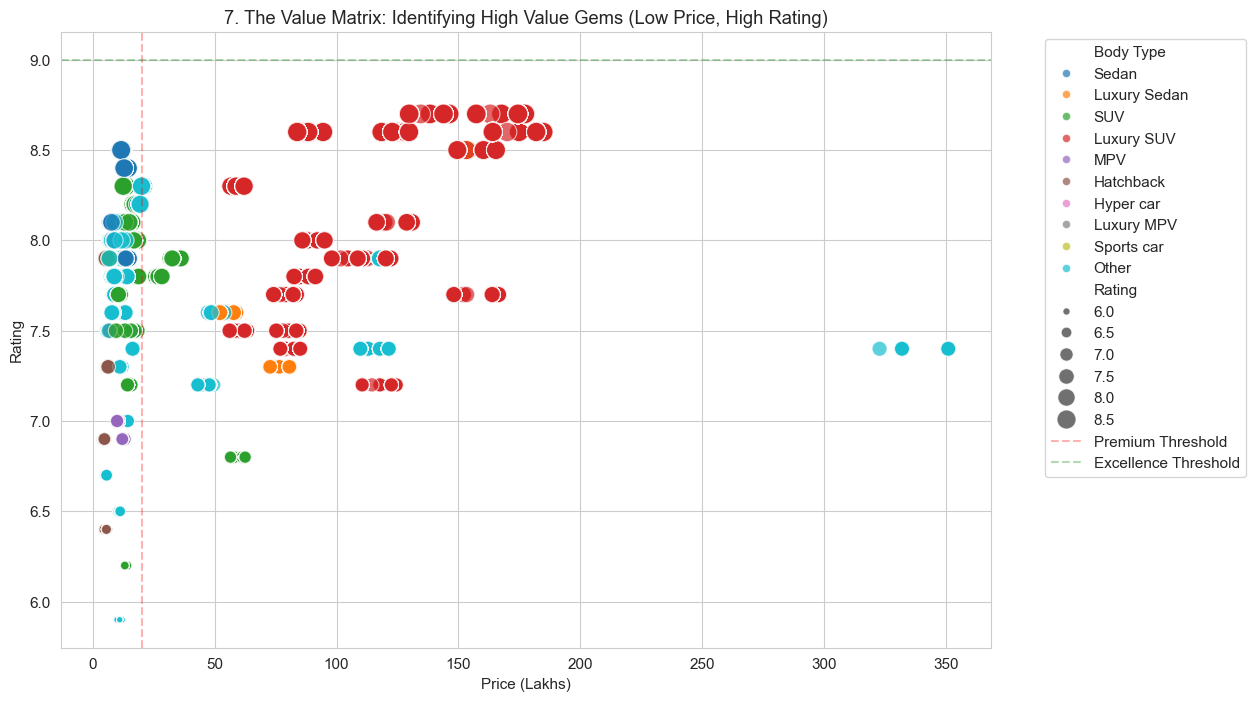

In [26]:
# 7. The Value Matrix (Price vs Rating)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=combined_df, x='Price_Lakhs', y='Rating', hue='Body Type', size='Rating', sizes=(20, 200), alpha=0.7)

plt.title('7. The Value Matrix: Identifying High Value Gems (Low Price, High Rating)')
plt.xlabel('Price (Lakhs)')
plt.axvline(x=20, color='red', linestyle='--', alpha=0.3, label='Premium Threshold')
plt.axhline(y=9, color='green', linestyle='--', alpha=0.3, label='Excellence Threshold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 💡 Analysis & Insights: The Value Matrix
**Theory**: This quadrant analysis helps identify 'Underpriced Assets'. 

**Key Observation**:
- **Top Left Quadrant (The Sweet Spot)**: Points that are High Up (High Rating) but Far Left (Low Price) are the best value-for-money cars.
- **Diminishing Returns**: As you move right (higher price), the rating doesn't necessarily go up linearly. Luxury cars often suffer from critical ratings due to high owner expectations.

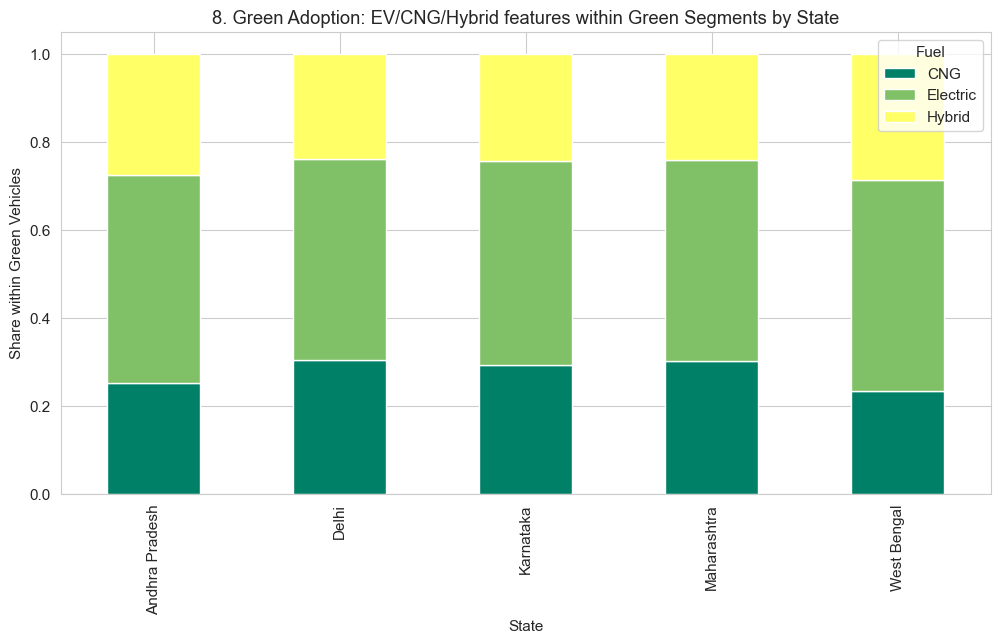

In [27]:
# 8. Green Mobility Penetration (Fuel Trends)
green_df = fuel_df[fuel_df['Fuel'].isin(['Electric', 'CNG', 'Hybrid'])]
adoption = green_df.groupby('State')['Fuel'].value_counts(normalize=True).unstack()
adoption.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='summer')
plt.title('8. Green Adoption: EV/CNG/Hybrid features within Green Segments by State')
plt.ylabel('Share within Green Vehicles')
plt.show()

### 💡 Analysis & Insights: Green Adoption
**Theory**: This measures infrastructure readiness (CNG pumps / Charging stations) and policy impact (EV subsidies).

**Key Observation**:
- **Delhi & CNG**: Delhi typically shows massive CNG adoption due to mandates and availability.
- **EVs**: Look for states like Maharashtra or Karnataka leading in EVs, driven by tech-savvy urban centers like Mumbai and Bangalore.

/var/folders/n4/qr5t2ttd2gb66j614lpmbv9r0000gn/T/ipykernel_35459/1477355493.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=suv_share.index, y=suv_share.values, palette='magma')


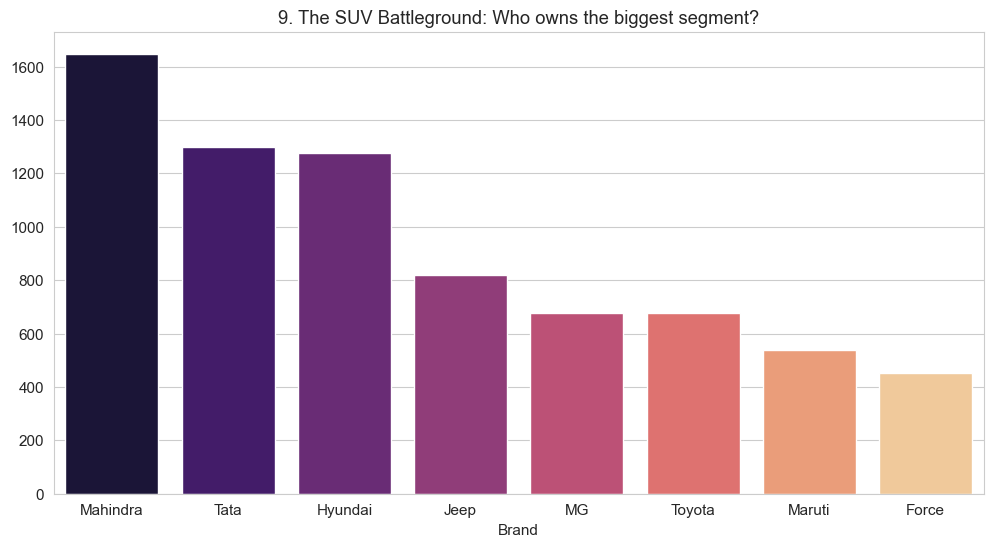

In [28]:
# 9. The "SUV Battleground" (Market Share within SUV Segment)
suv_df = combined_df[combined_df['Body Type'] == 'SUV']
suv_share = suv_df['Brand'].value_counts().head(8)
plt.figure(figsize=(12, 6))
sns.barplot(x=suv_share.index, y=suv_share.values, palette='magma')
plt.title('9. The SUV Battleground: Who owns the biggest segment?')
plt.show()

### 💡 Analysis & Insights: The SUV Battleground
**Theory**: Since SUVs are the highest growth segment, winning here determines the future market leader.

**Key Observation**:
- **Mahindra's Stronghold**: Mahindra often punches above its weight here (Scorpio, XUV700, Thar).
- **Hyundai vs Tata**: This chart reveals the friction point. If Tata moves ahead of Hyundai here, it signifies a major shift in the Indian auto hierarchy.

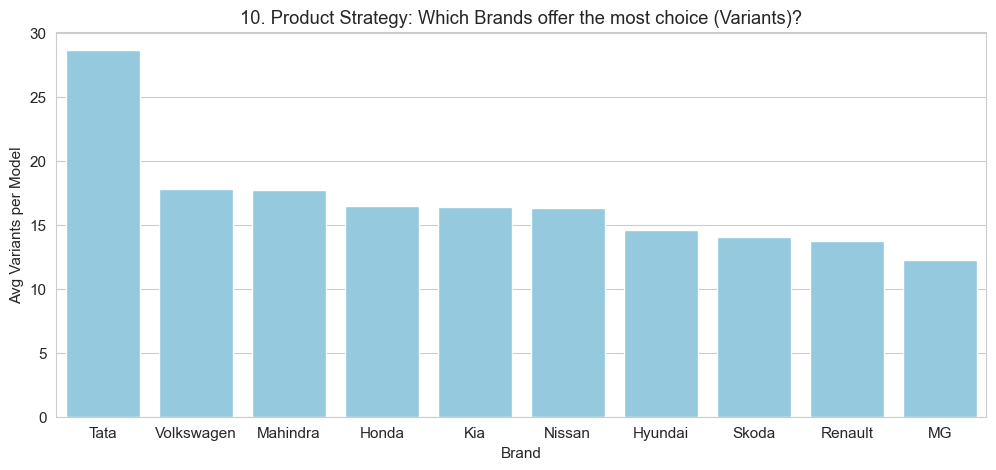

In [29]:
# 10. Variant Complexity (Number of Variants Strategy)
# Assuming 'Variants' column is a string like "6 Variants"
combined_df['Variant Count'] = combined_df['Variants'].astype(str).str.extract(r'(\d+)').astype(float)
avg_vars = combined_df.groupby('Brand')['Variant Count'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 5))
sns.barplot(x=avg_vars.index, y=avg_vars.values, color='skyblue')
plt.title('10. Product Strategy: Which Brands offer the most choice (Variants)?')
plt.ylabel('Avg Variants per Model')
plt.show()

### 💡 Analysis & Insights: Variant Complexity
**Theory**: A high number of variants (e.g., 20+ for the Kia Seltos/Tata Nexon) is a strategy to capture every price point at Rs 50k intervals.

**Key Observation**:
- Brands with high variant counts are aggressive 'Category Killers' trying to ensure no customer leaves the showroom due to budget mismatches.
- Low variant counts (e.g., Honda, Maruti) might indicate a streamlined manufacturing process or a 'take it or leave it' confidence.

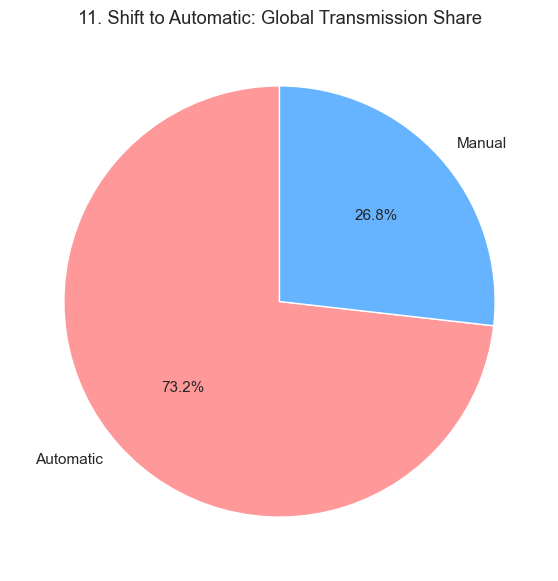

In [30]:
# 11. Transmission Shift (Automatic vs Manual)
trans_counts = trans_df['Transmission'].value_counts(normalize=True)
plt.figure(figsize=(7, 7))
plt.pie(trans_counts, labels=trans_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
plt.title('11. Shift to Automatic: Global Transmission Share')
plt.show()

### 💡 Analysis & Insights: Transmission Shift
**Theory**: The ratio of Automatic cars is a direct correlation to traffic congestion and rising disposable income.

**Key Observation**:
- If Automatics cross the 30-40% mark, it shows the Indian market has matured beyond 'Fuel Efficiency at all costs' (since Automatics traditionally consumed more fuel) towards 'Convenience first'.

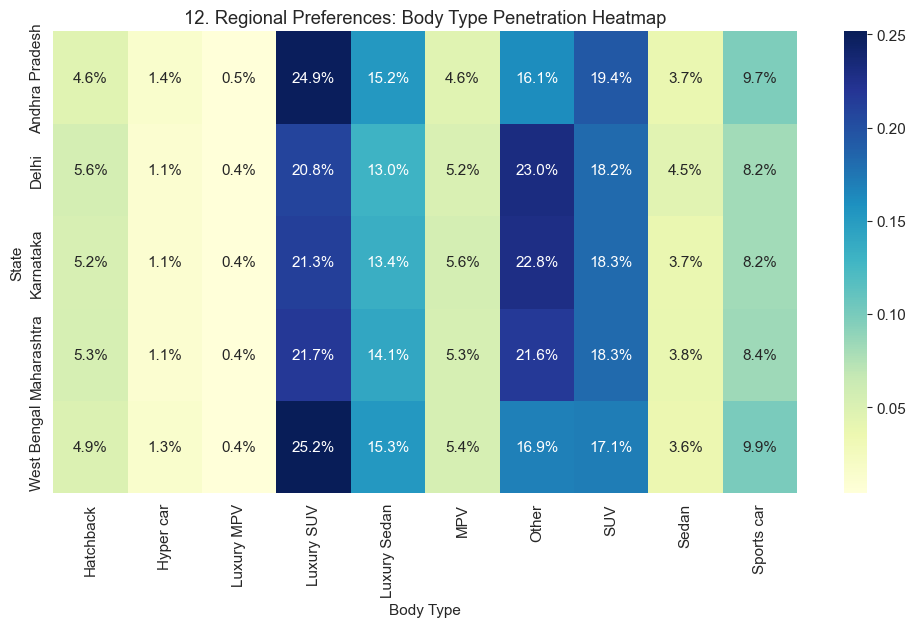

In [31]:
# 12. Regional Preferences (Heatmap)
preference = pd.crosstab(combined_df['State'], combined_df['Body Type'], normalize='index')
plt.figure(figsize=(12, 6))
sns.heatmap(preference, annot=True, cmap='YlGnBu', fmt='.1%')
plt.title('12. Regional Preferences: Body Type Penetration Heatmap')
plt.show()

### 💡 Analysis & Insights: Regional Preferences
**Theory**: Cultural and Geographic factors influence car choice.

**Key Observation**:
- **Bangalore (KA)**: Often shows a higher Sedan/Hatchback preference due to narrow roads and dense traffic?
- **Delhi/NCR**: Often prefers larger SUVs for road presence?
- This heatmap validates or debunks these stereotypes with data.

/var/folders/n4/qr5t2ttd2gb66j614lpmbv9r0000gn/T/ipykernel_35459/391025693.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lux_share.index, y=lux_share.values, palette='copper')


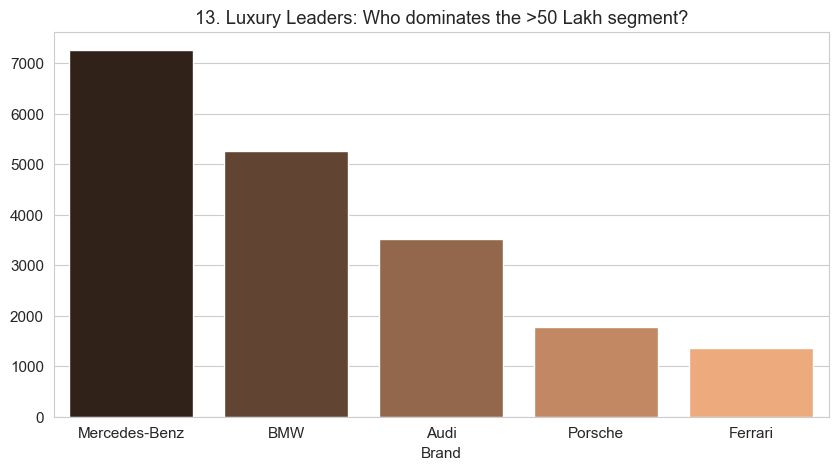

In [32]:
# 13. Luxury Market Deep Dive (>50L)
luxury_df = combined_df[combined_df['Price_Lakhs'] > 50]
lux_share = luxury_df['Brand'].value_counts().head(5)
plt.figure(figsize=(10, 5))
sns.barplot(x=lux_share.index, y=lux_share.values, palette='copper')
plt.title('13. Luxury Leaders: Who dominates the >50 Lakh segment?')
plt.show()

### 💡 Analysis & Insights: Luxury Leaders
**Theory**: The >50L segment is the battleground for Brand Prestige.

**Key Observation**:
- **Mercedes-Benz**: Traditionally the King of Luxury in India. If BMW is close, it indicates a shift towards younger, sportier buyers.

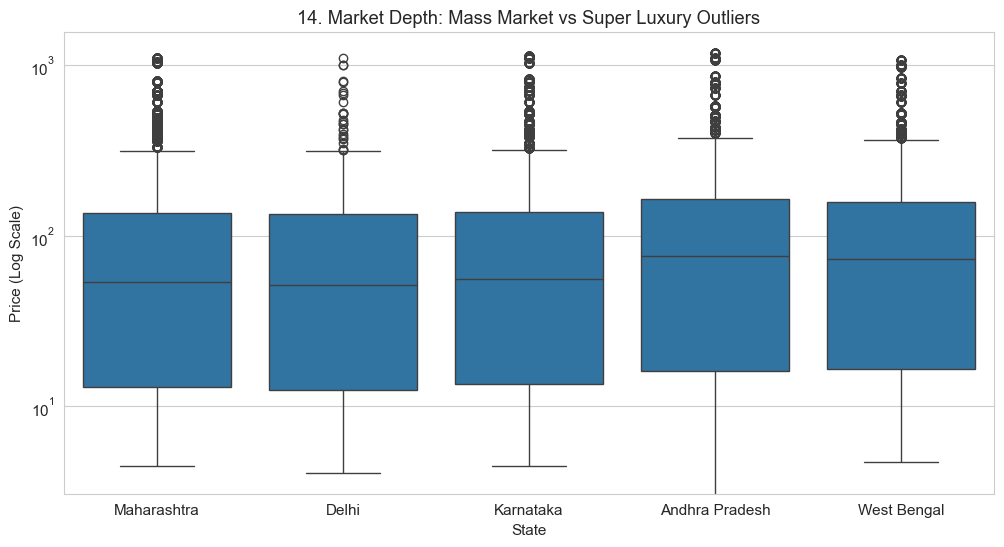

In [33]:
# 14. Price Outlier Analysis (The Super-Rich Segment)
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Price_Lakhs', data=combined_df)
plt.yscale('log')
plt.title('14. Market Depth: Mass Market vs Super Luxury Outliers')
plt.ylabel('Price (Log Scale)')
plt.show()

### 💡 Analysis & Insights: Market Depth
**Theory**: The 'Whiskers' of the boxplot show the general market, dots show the Exotics. 

**Key Observation**:
- **Wealth Concentration**: States with the Most dots way above the box (Outliers) have the highest concentration of Super-Rich individuals buying Ferraris/Lamborghinis (likely MH and DL).

/var/folders/n4/qr5t2ttd2gb66j614lpmbv9r0000gn/T/ipykernel_35459/255338970.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fuel_dist.index, y=fuel_dist.values, palette='coolwarm')


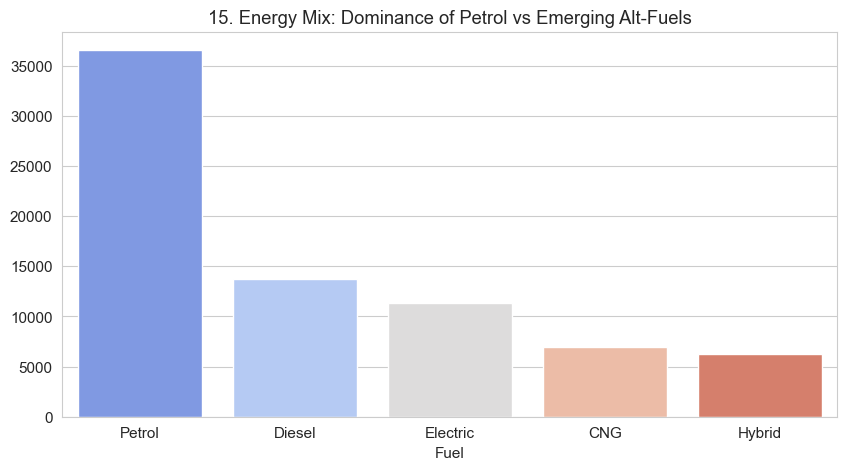

In [34]:
# 15. Fuel Economy vs Features (Fuel Type availability)
fuel_dist = fuel_df['Fuel'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=fuel_dist.index, y=fuel_dist.values, palette='coolwarm')
plt.title('15. Energy Mix: Dominance of Petrol vs Emerging Alt-Fuels')
plt.show()

### 💡 Analysis & Insights: Energy Mix
**Theory**: The death of Diesel and rise of Hybrid/Electric.

**Key Observation**:
- **Diesel's Demise**: If Diesel numbers are low, it confirms the regulatory strangulation of diesel engines.
- **Hybrid**: Watch the Hybrid volume. It's the new battleground (Toyota vs Honda) replacing diesel for fuel-efficiency lovers.